In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing.csv


In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing.csv')

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [8]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [9]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [11]:
df['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [12]:
df['pdays'].value_counts().sum()

45211

In [13]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [14]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

MEAN AND MEDIAN ARE FAR AWAY THERE ARE OUTLIERS IN PDAYS

Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [15]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

mean has an value of 40
and the medain has value of -1

Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median

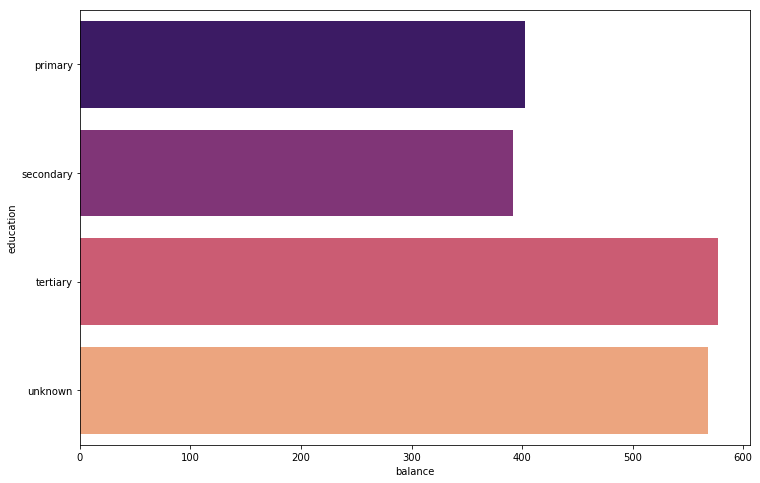

In [16]:
x = df.groupby(['education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="balance", y="education", data=x,
            label="Total", palette="magma")
plt.show()

In [17]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

tertiary has highest median

Make a box plot for pdays. Do you see any outliers?

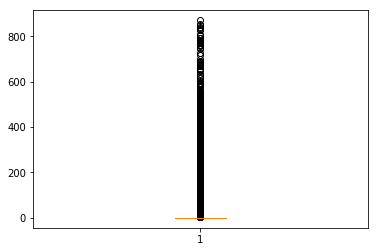

In [18]:
plt.boxplot(df['pdays'])
plt.show()

THERE ARE OUTLIERS IN P-DAYS

In [19]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


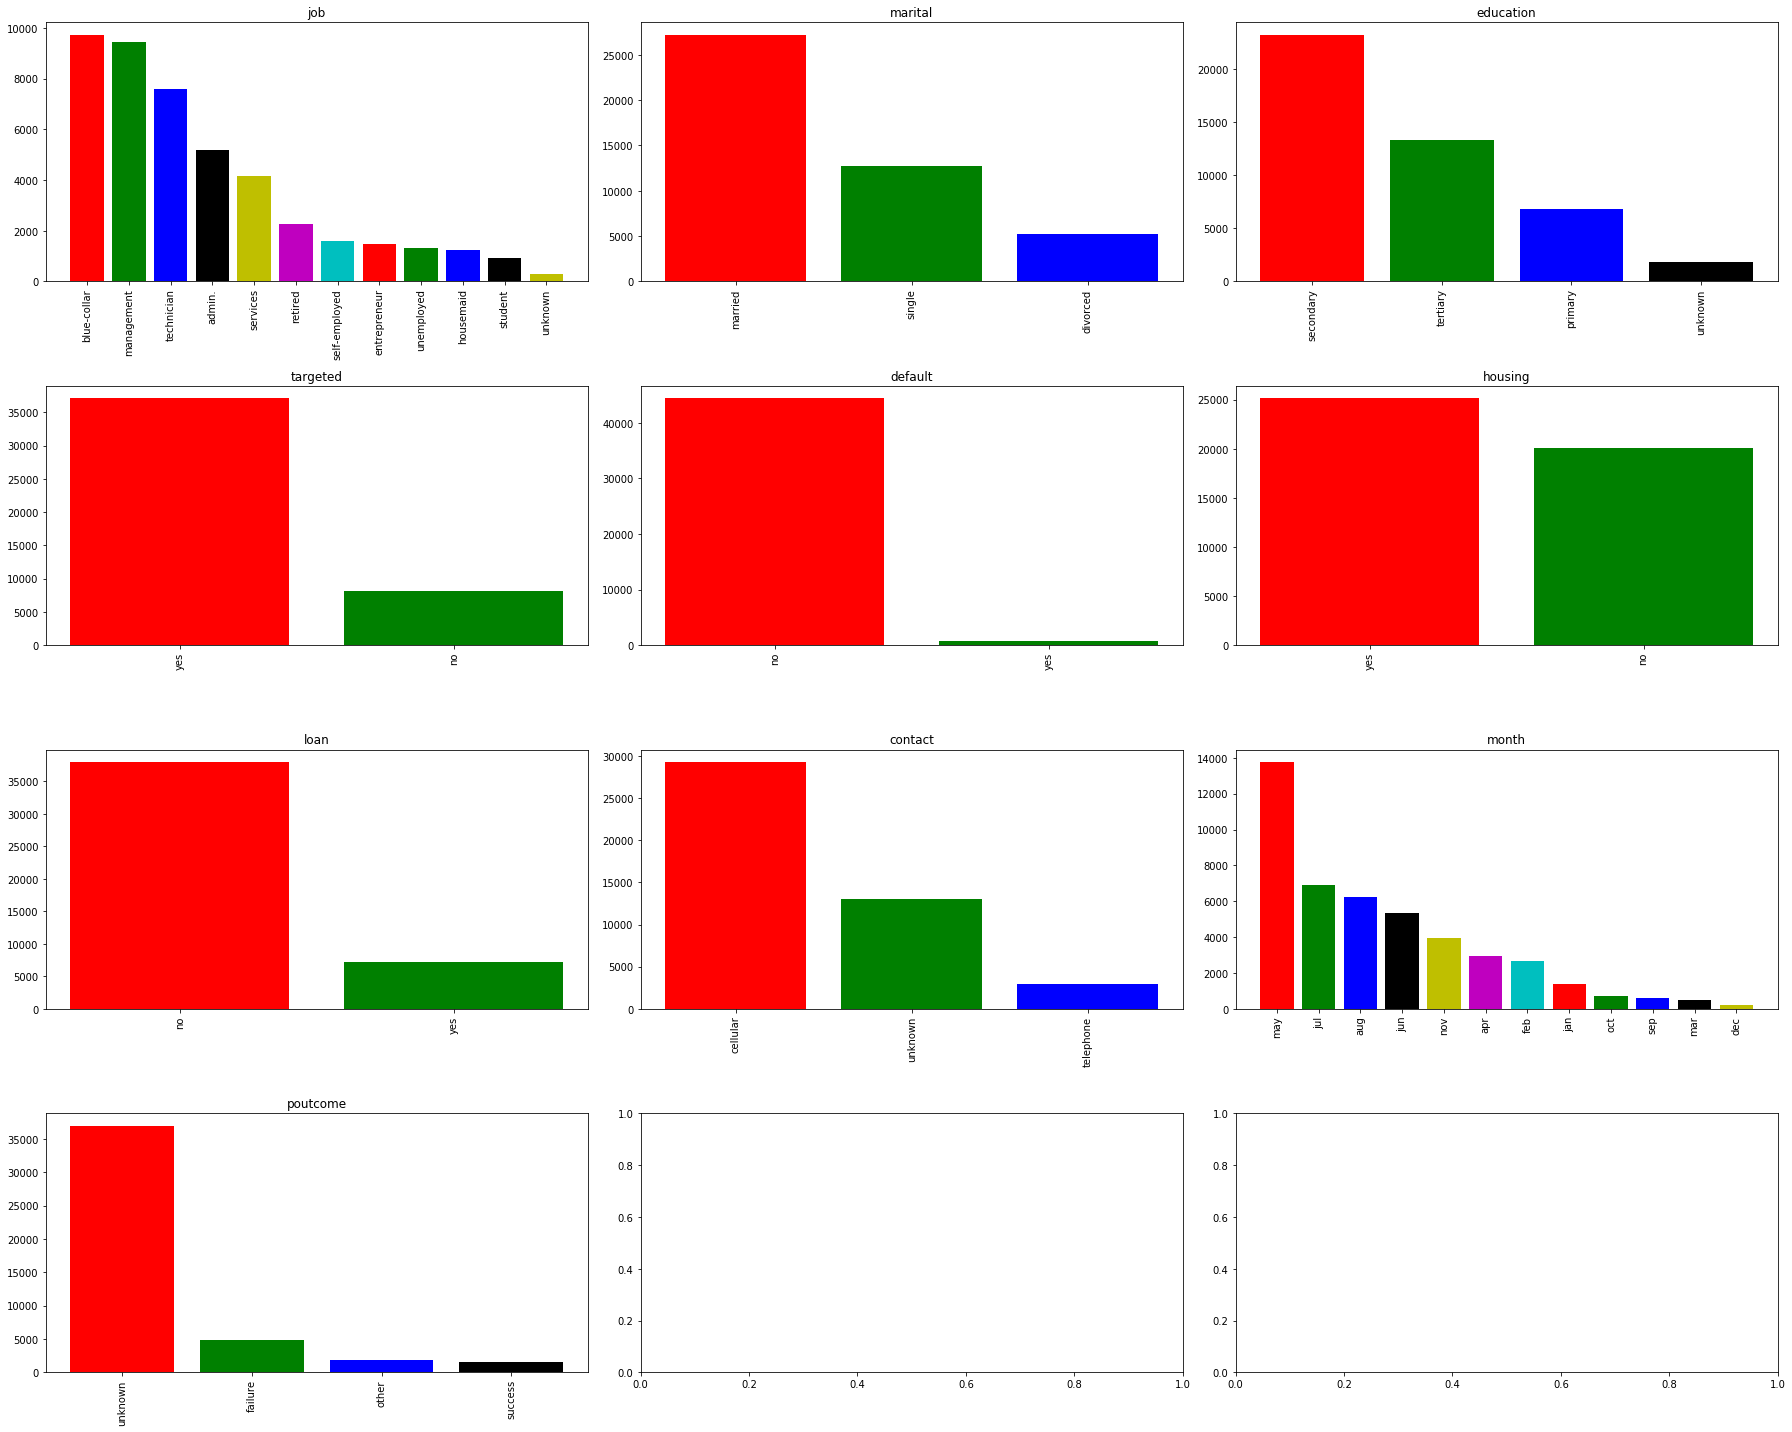

In [20]:
cat = ['job', 'marital', 'education', 'targeted',   'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axis = plt.subplots(4, 3,  figsize=(25, 20))

counter = 0
for items in cat:
    value_counts = df[items].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    my_colors = 'rgbkymc'
    
    axis[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index,color=my_colors)
    
    axis[trace_x, trace_y].set_title(items)
    
    for tick in axis[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.tight_layout()
plt.show()

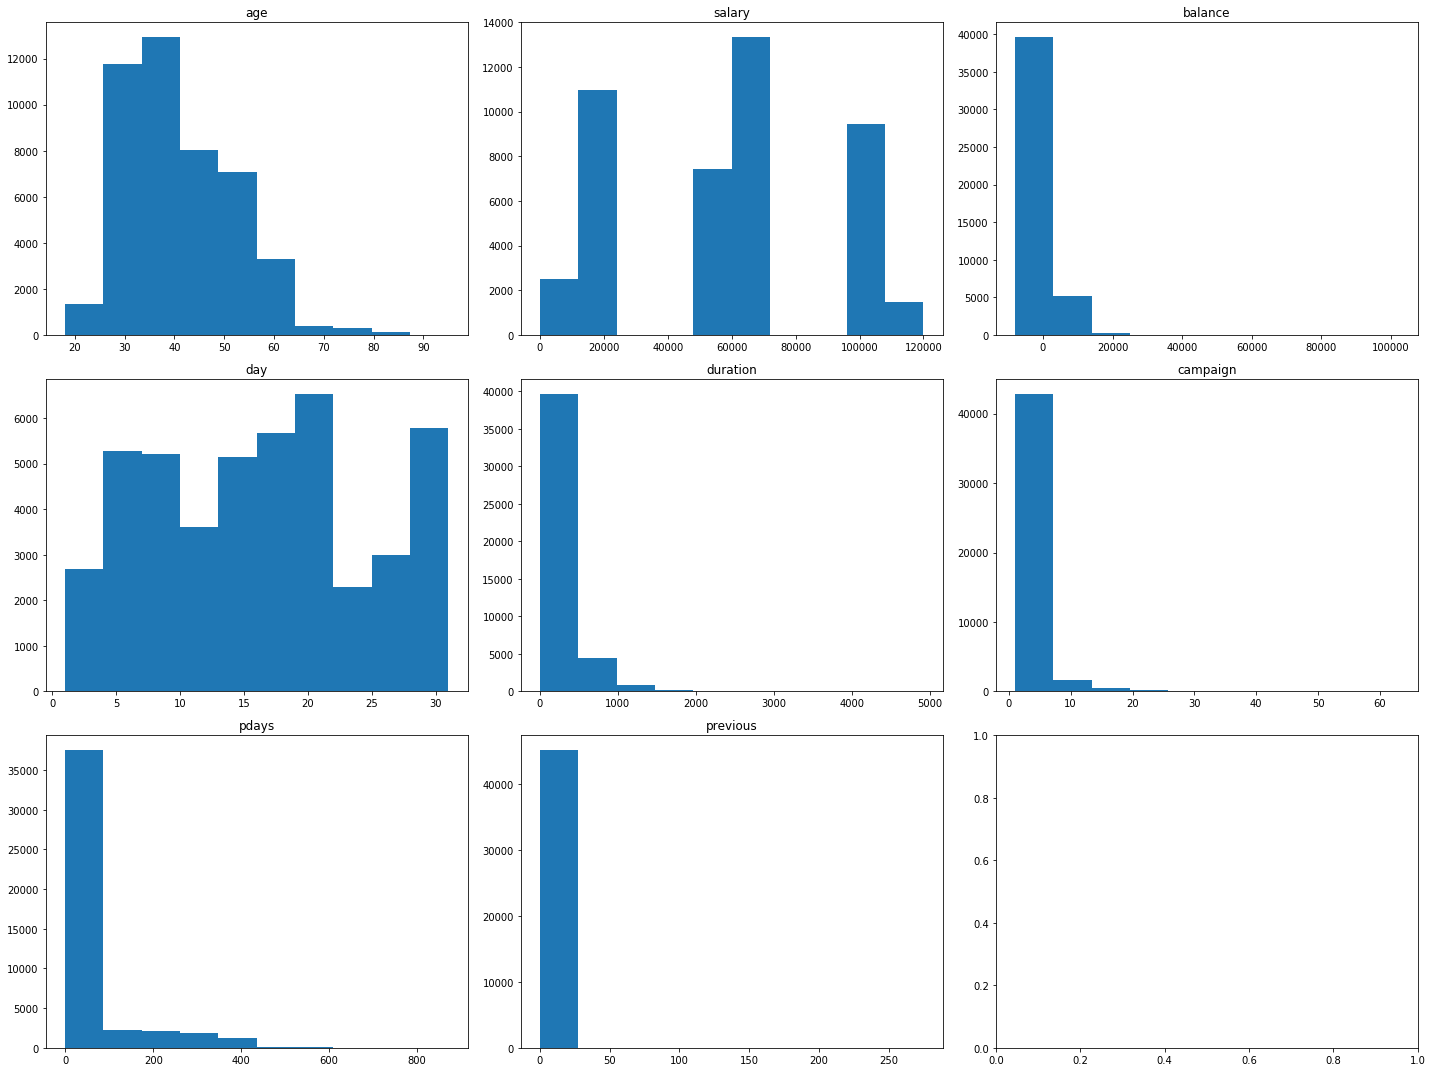

In [21]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axis = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for items in num:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    
    axis[trace_x, trace_y].hist(df[items])
    
    axis[trace_x, trace_y].set_title(items)
    
    counter += 1

plt.tight_layout()
plt.show()

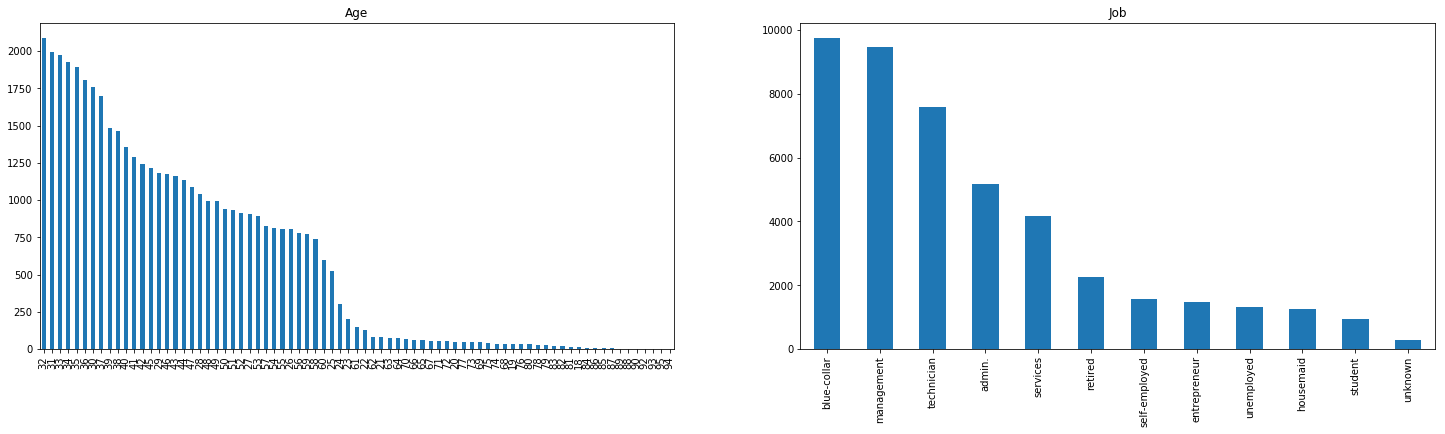

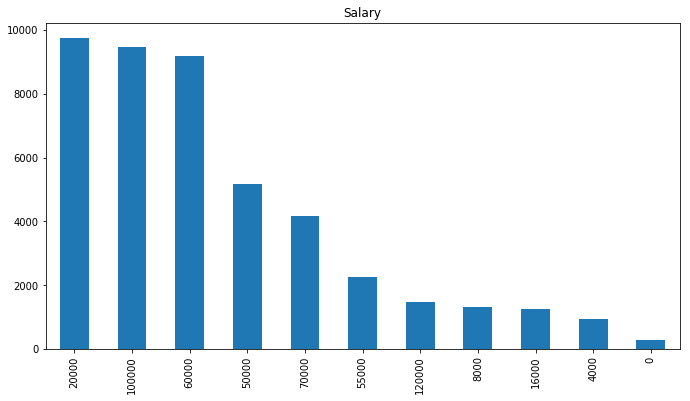

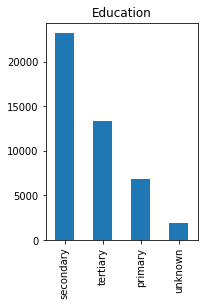

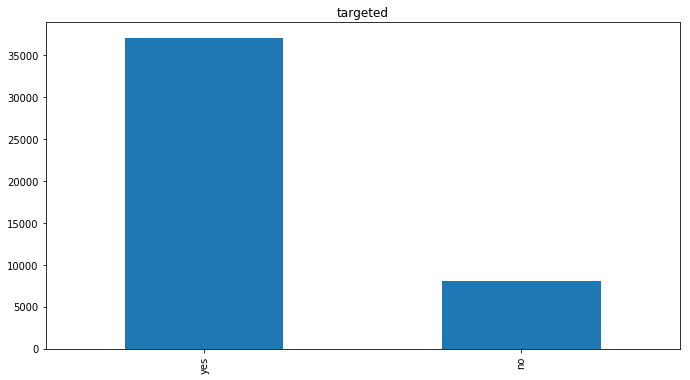

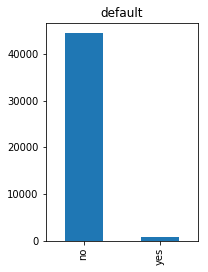

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(25, 6))



plt.subplot(1,2,1)
plt1 = df.age.value_counts().plot('bar')
plt.title('Age')


plt.subplot(1,2,2)
plt1 = df.job.value_counts().plot('bar')
plt.title('Job')

plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = df.salary.value_counts().plot('bar')
plt.title('Salary')
plt.show()

plt.subplot(1,2,2)
plt1 = df.education.value_counts().plot('bar')
plt.title('Education')
plt.show()


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = df.targeted.value_counts().plot('bar')
plt.title('targeted')
plt.show()

plt.subplot(1,2,2)
plt1 = df.default.value_counts().plot('bar')
plt.title('default')
plt.show()









plt.tight_layout()
plt.show()

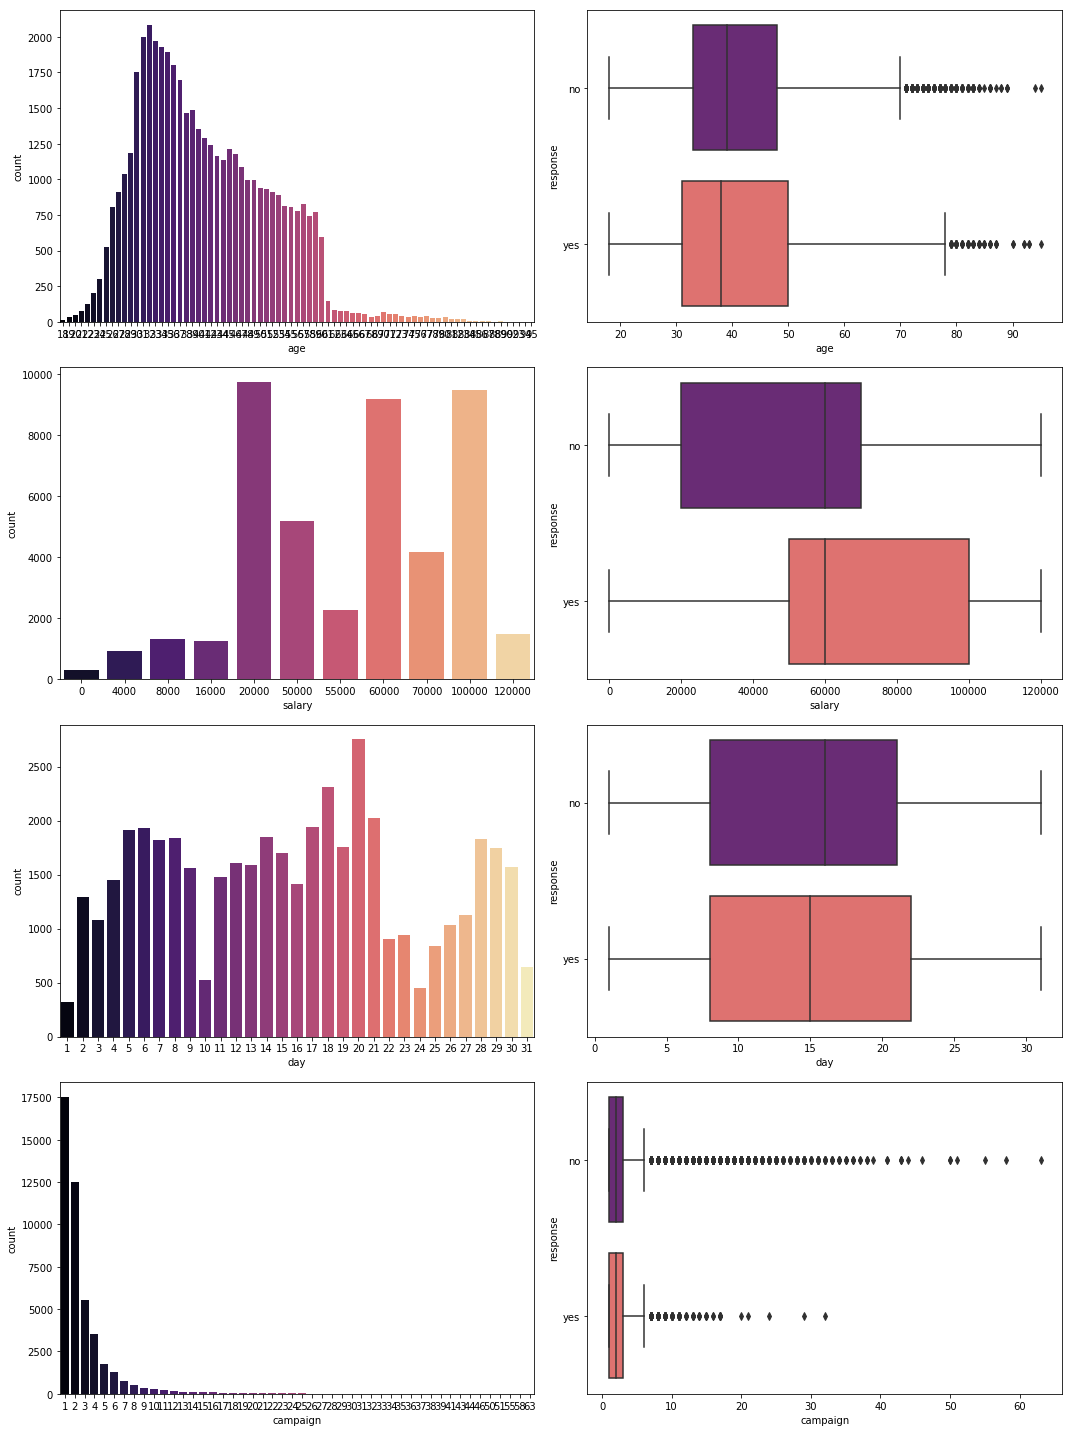

In [23]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
   
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    
    sns.boxplot(x=df[x], y=df.response, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('age', 1)
plot_count('salary', 3)
plot_count('day', 5)
plot_count('campaign', 7)


plt.tight_layout()
plt.show()

In [24]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


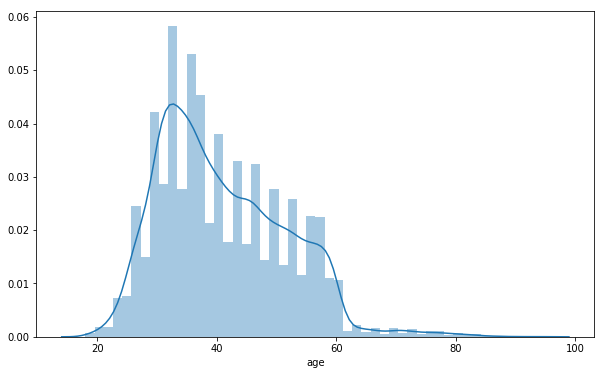

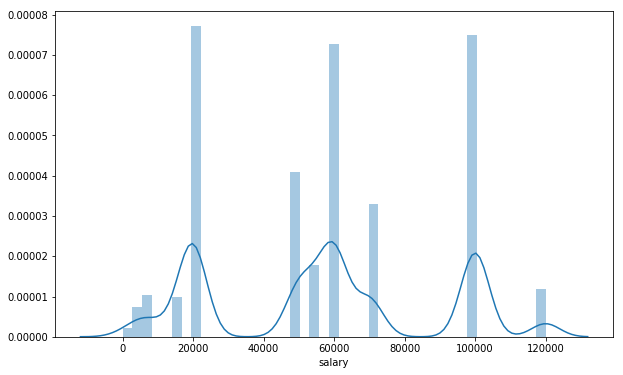

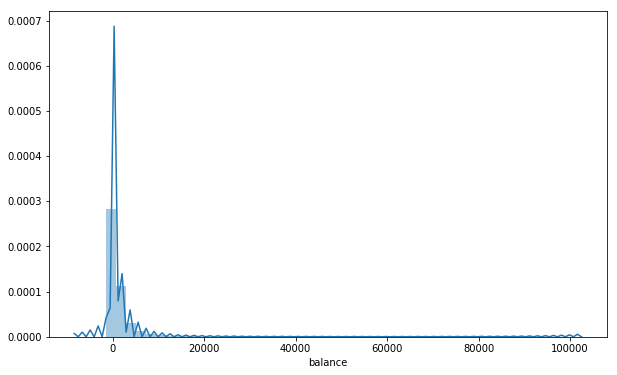

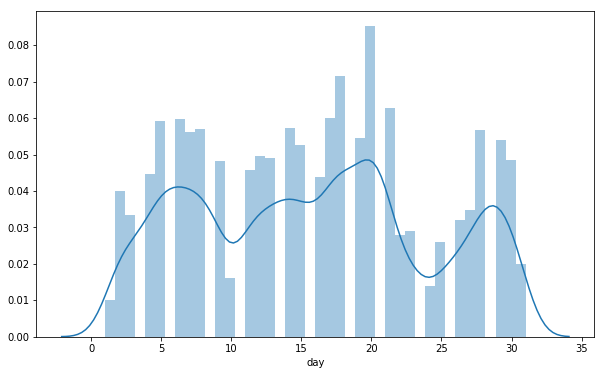

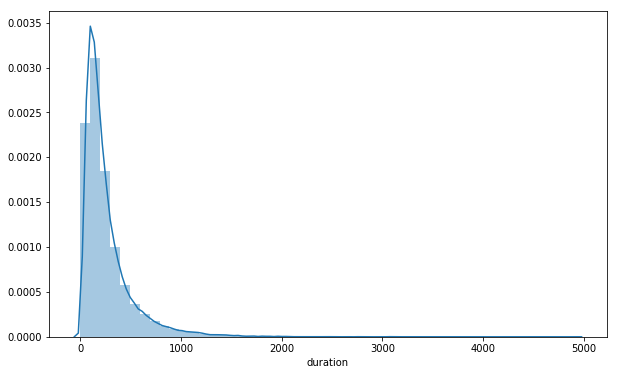

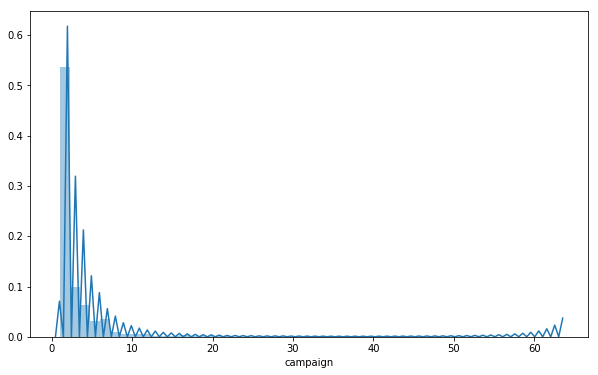

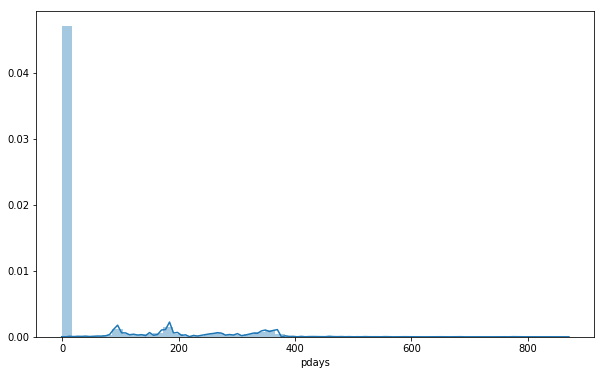

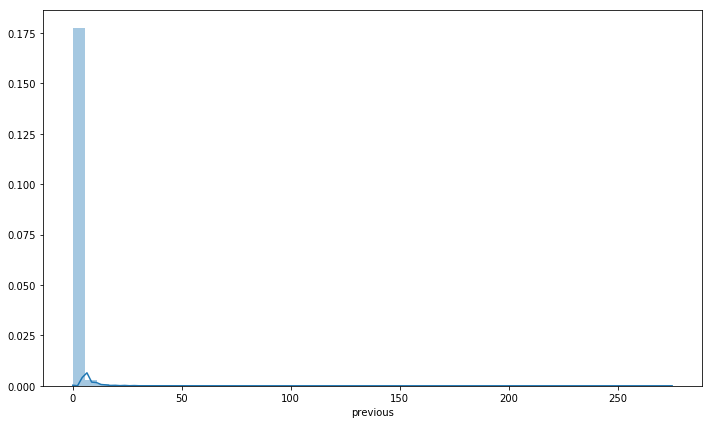

In [25]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,6))
    sns.distplot(df[items])
    
plt.tight_layout()

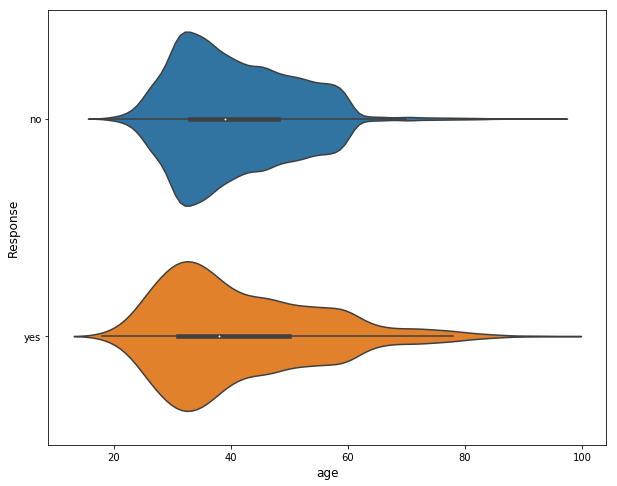

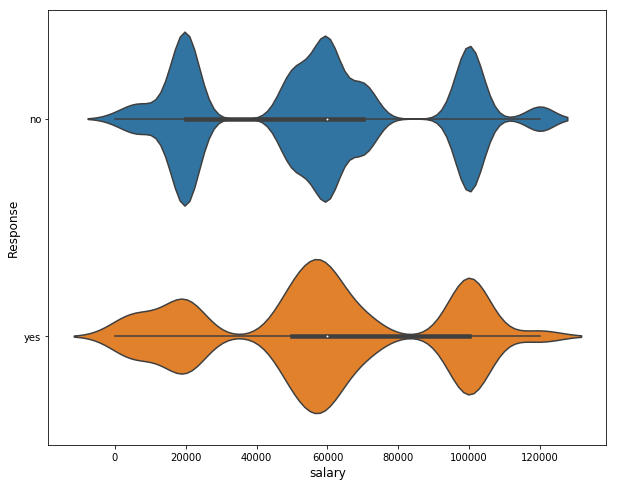

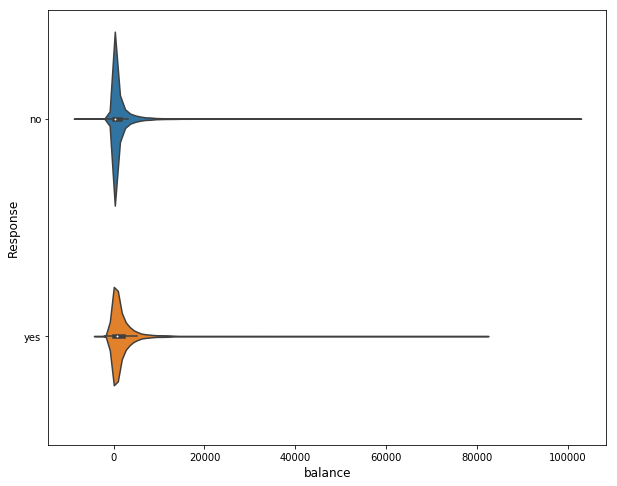

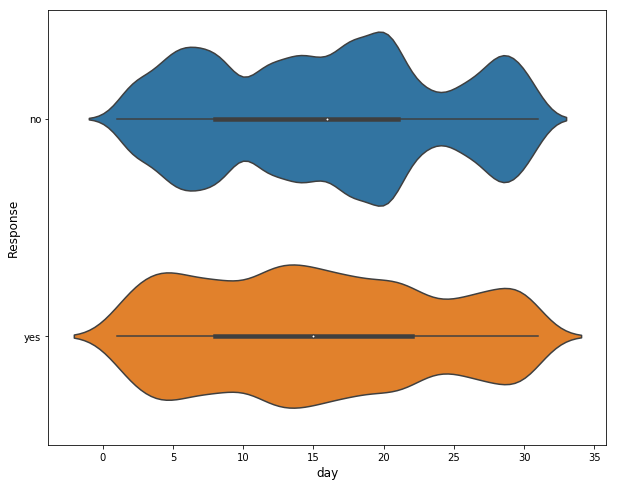

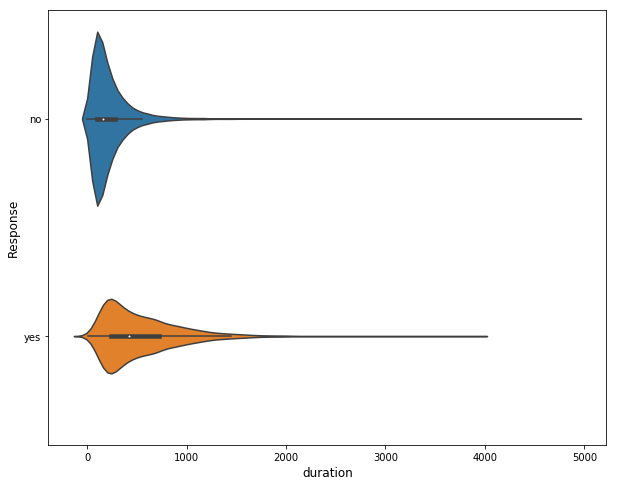

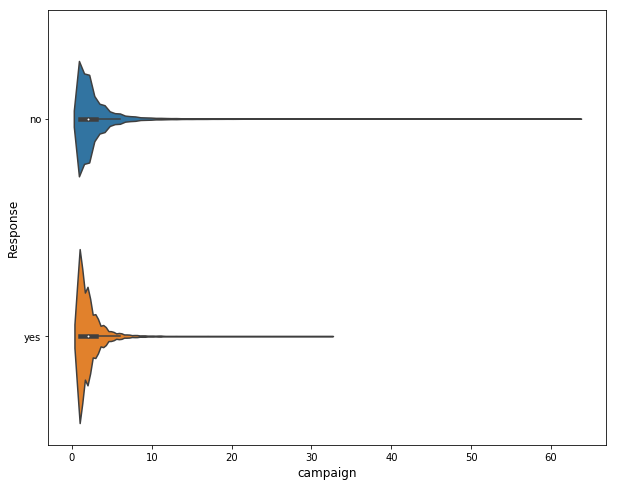

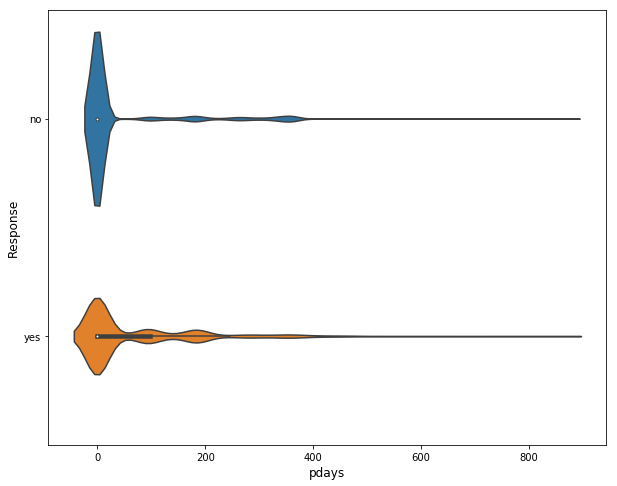

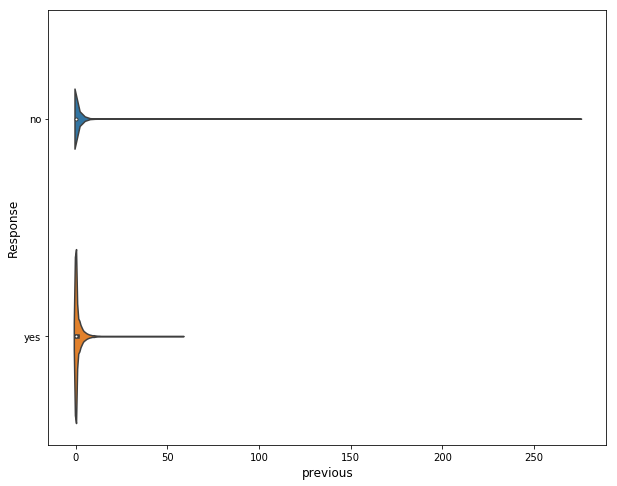

In [26]:


num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']


for item in num:
    plt.figure(figsize=(10,8))
    sns.violinplot(df[item],df["response"])
    
    plt.xlabel(item,fontsize=12)
    plt.ylabel("Response",fontsize=12)
    plt.show()

In [27]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


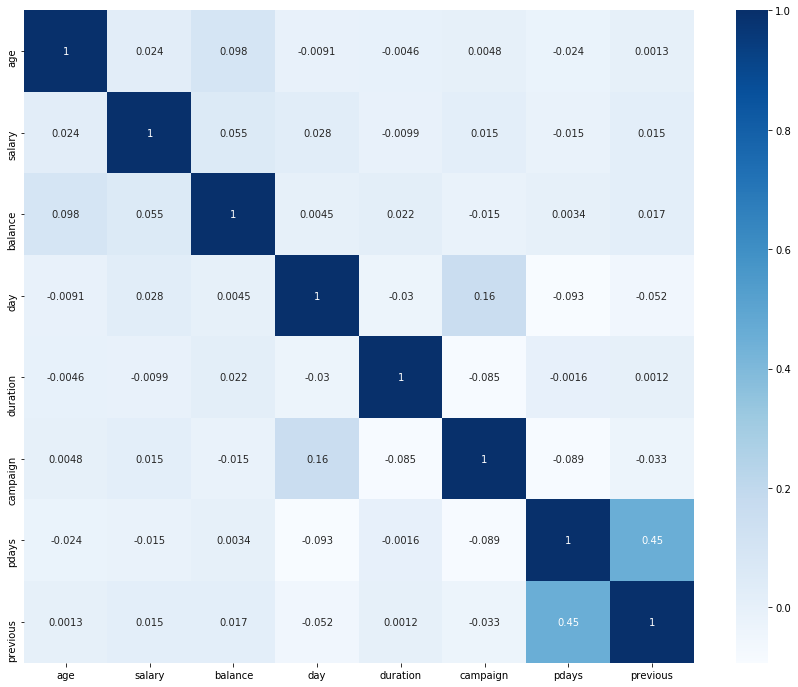

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

<Figure size 720x576 with 0 Axes>

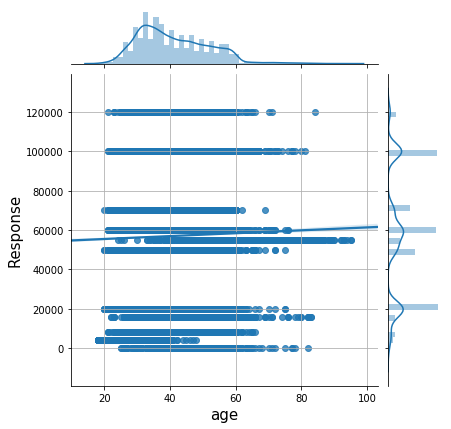

<Figure size 720x576 with 0 Axes>

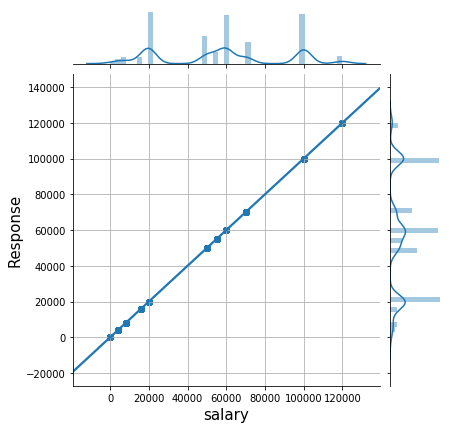

<Figure size 720x576 with 0 Axes>

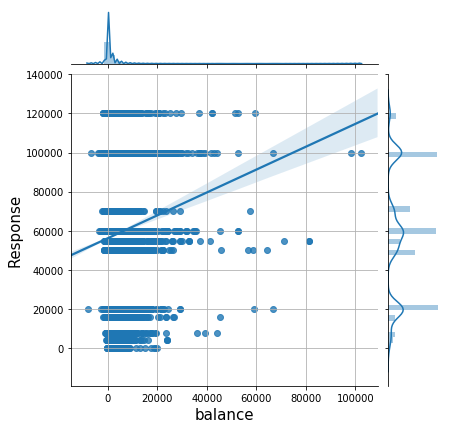

<Figure size 720x576 with 0 Axes>

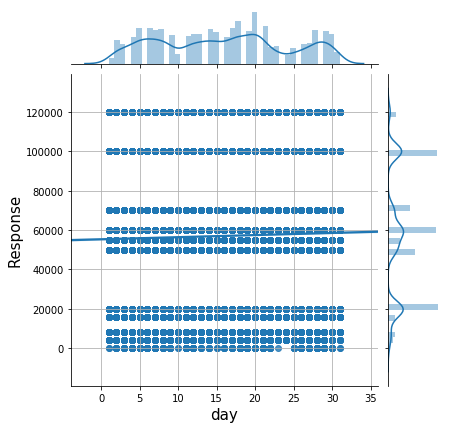

<Figure size 720x576 with 0 Axes>

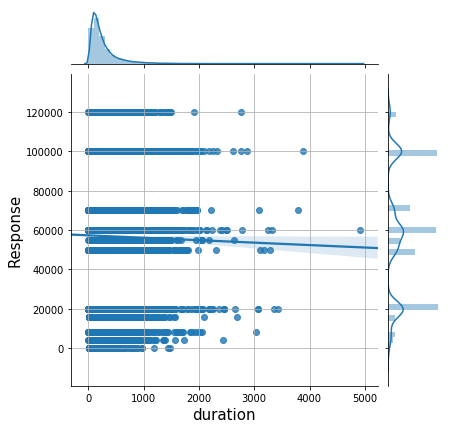

<Figure size 720x576 with 0 Axes>

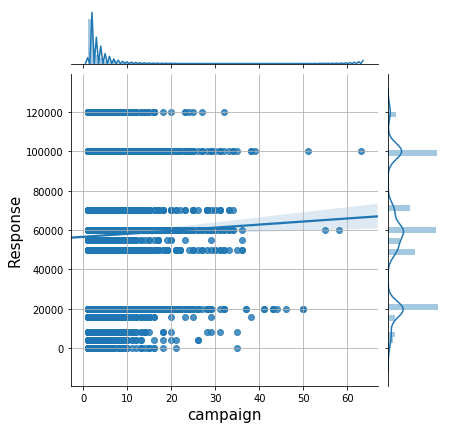

<Figure size 720x576 with 0 Axes>

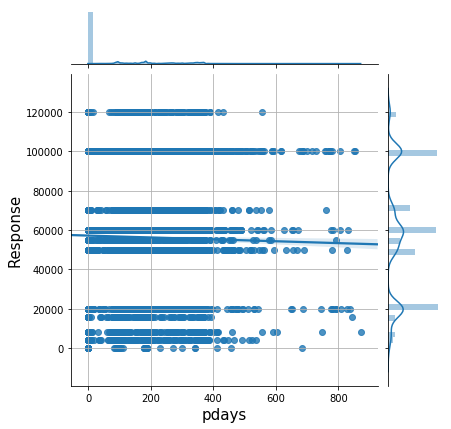

<Figure size 720x576 with 0 Axes>

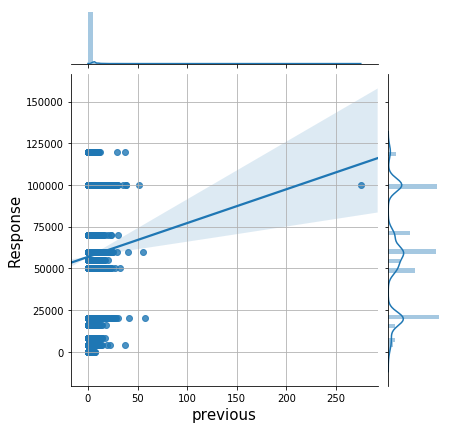

In [29]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['salary'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<Figure size 720x576 with 0 Axes>

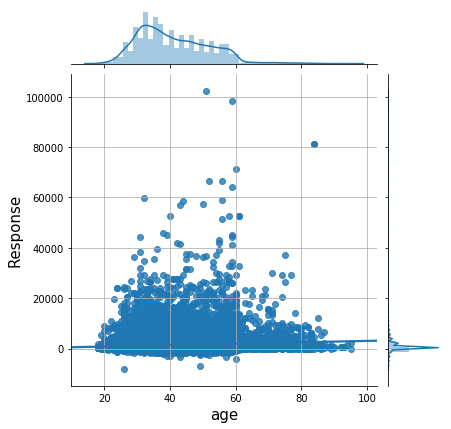

<Figure size 720x576 with 0 Axes>

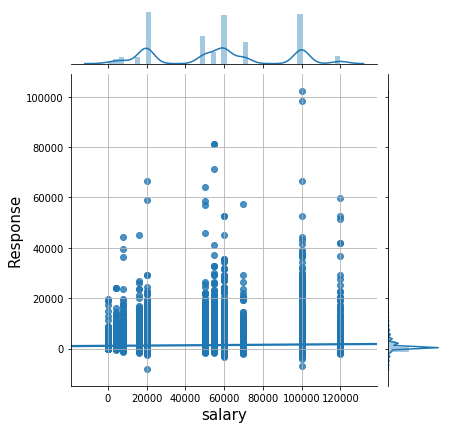

<Figure size 720x576 with 0 Axes>

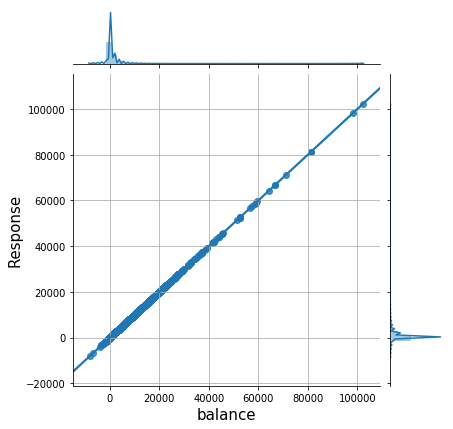

<Figure size 720x576 with 0 Axes>

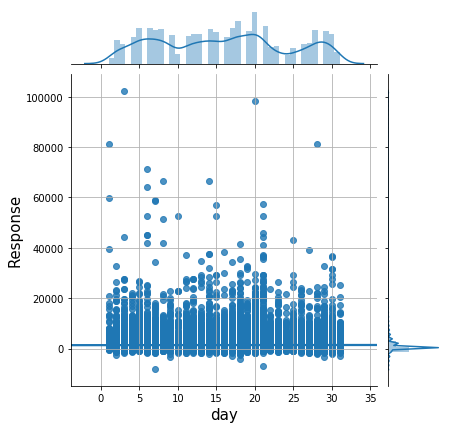

<Figure size 720x576 with 0 Axes>

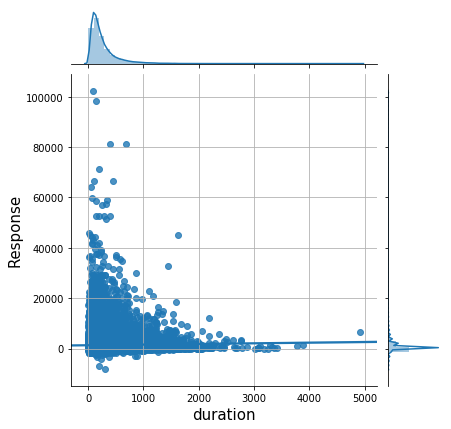

<Figure size 720x576 with 0 Axes>

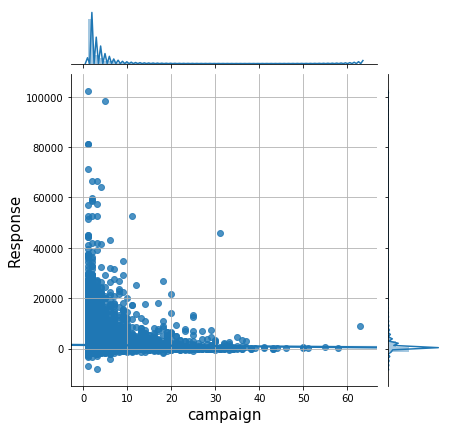

<Figure size 720x576 with 0 Axes>

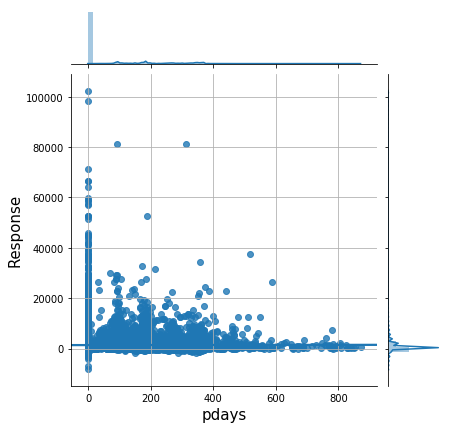

<Figure size 720x576 with 0 Axes>

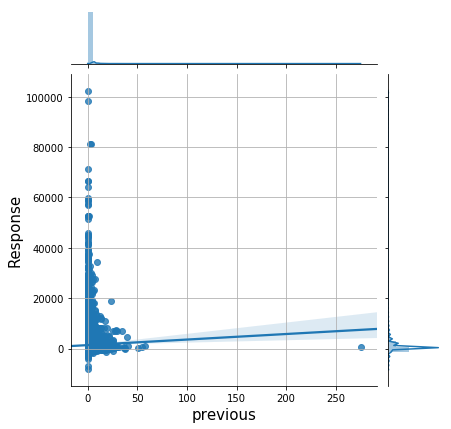

In [30]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['balance'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<Figure size 720x576 with 0 Axes>

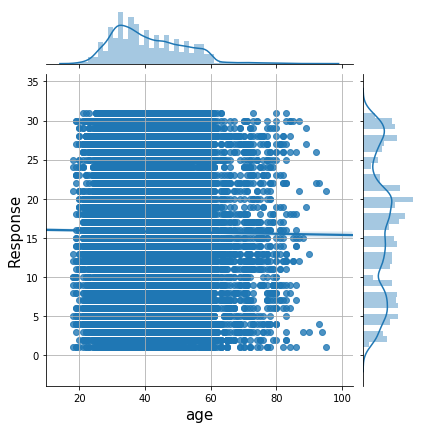

<Figure size 720x576 with 0 Axes>

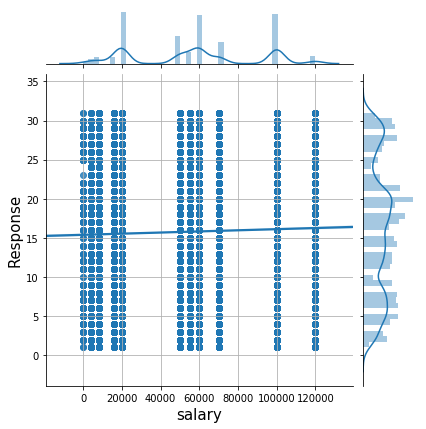

<Figure size 720x576 with 0 Axes>

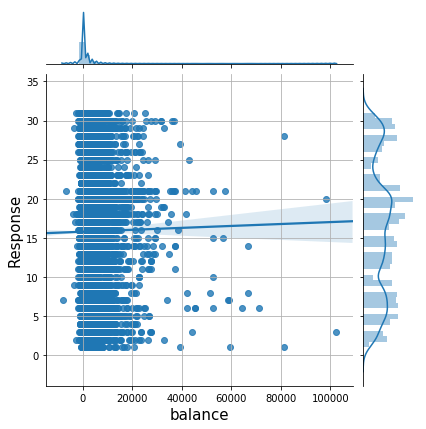

<Figure size 720x576 with 0 Axes>

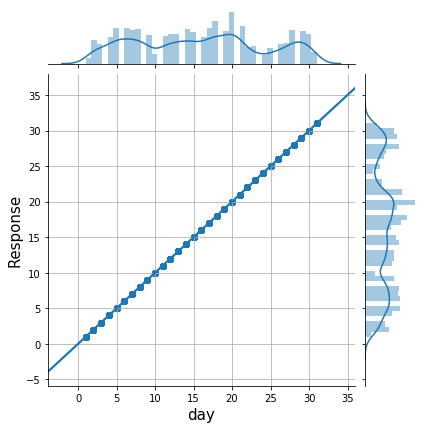

<Figure size 720x576 with 0 Axes>

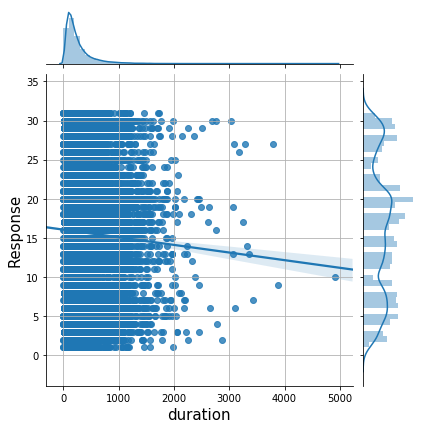

<Figure size 720x576 with 0 Axes>

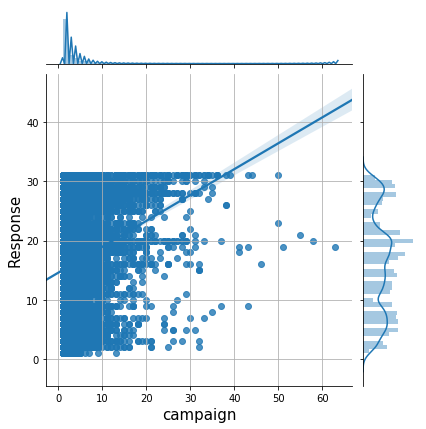

<Figure size 720x576 with 0 Axes>

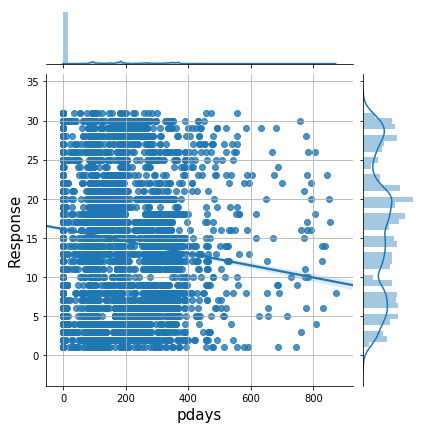

<Figure size 720x576 with 0 Axes>

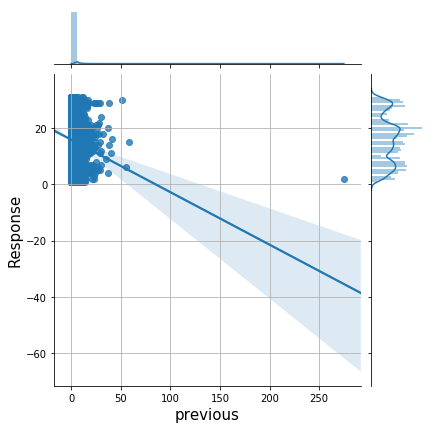

In [31]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['day'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<Figure size 720x576 with 0 Axes>

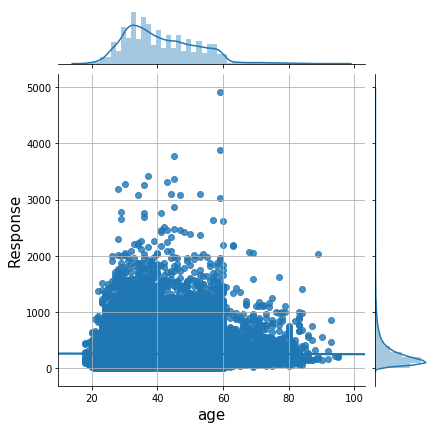

<Figure size 720x576 with 0 Axes>

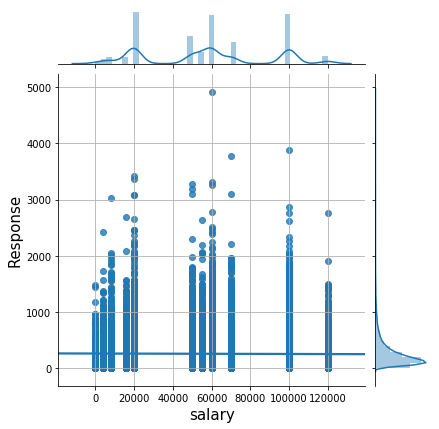

<Figure size 720x576 with 0 Axes>

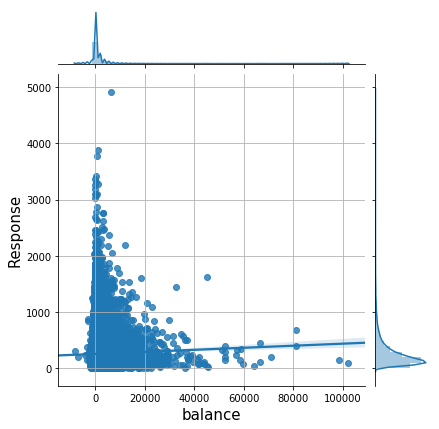

<Figure size 720x576 with 0 Axes>

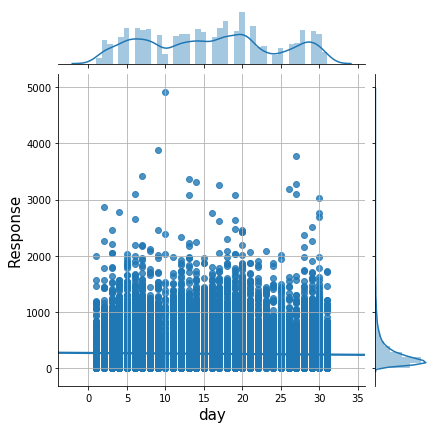

<Figure size 720x576 with 0 Axes>

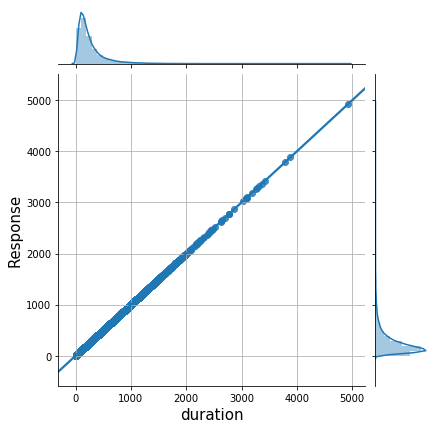

<Figure size 720x576 with 0 Axes>

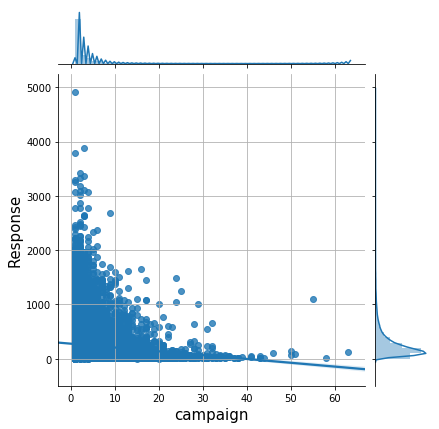

<Figure size 720x576 with 0 Axes>

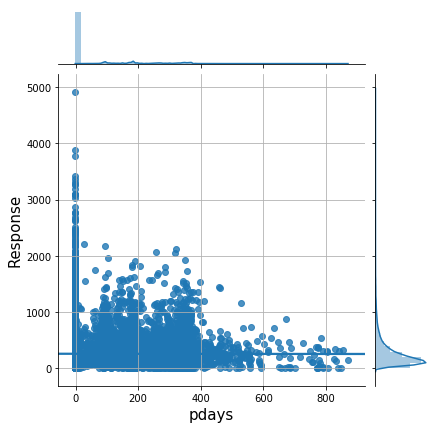

<Figure size 720x576 with 0 Axes>

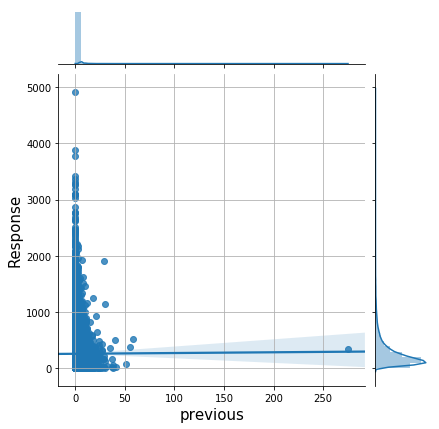

In [32]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['duration'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<Figure size 720x576 with 0 Axes>

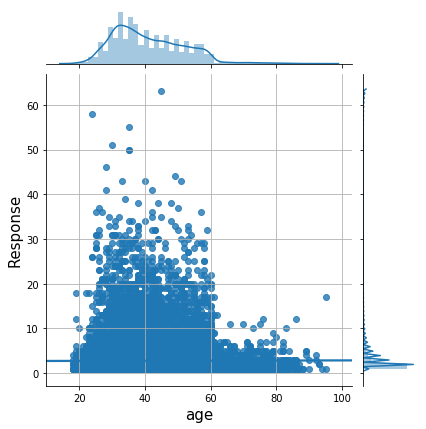

<Figure size 720x576 with 0 Axes>

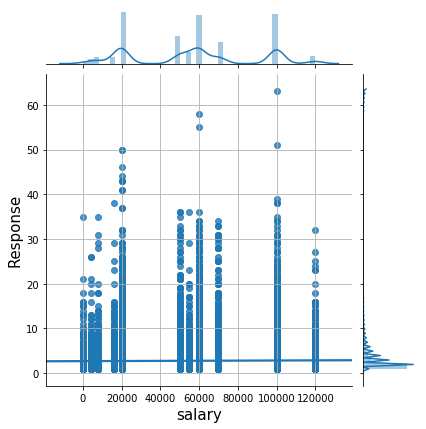

<Figure size 720x576 with 0 Axes>

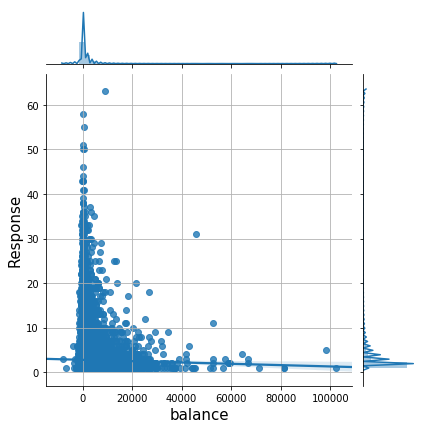

<Figure size 720x576 with 0 Axes>

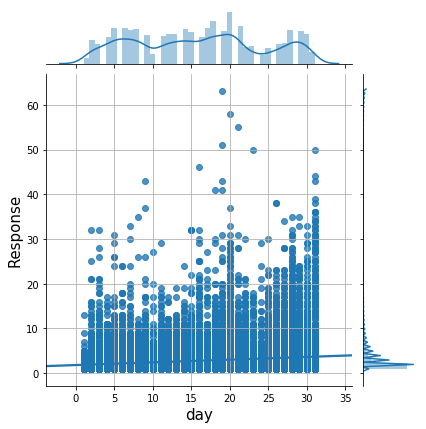

<Figure size 720x576 with 0 Axes>

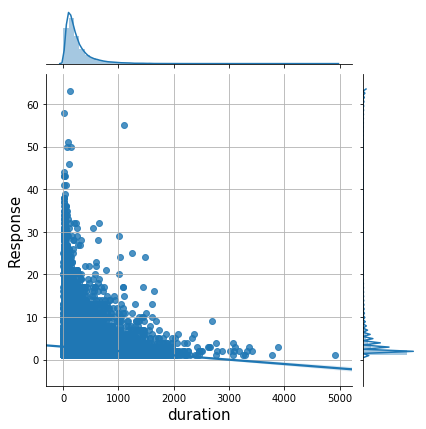

<Figure size 720x576 with 0 Axes>

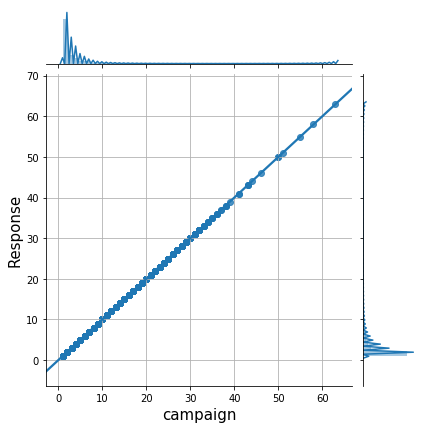

<Figure size 720x576 with 0 Axes>

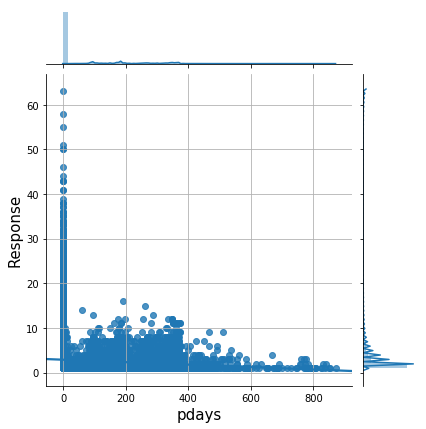

<Figure size 720x576 with 0 Axes>

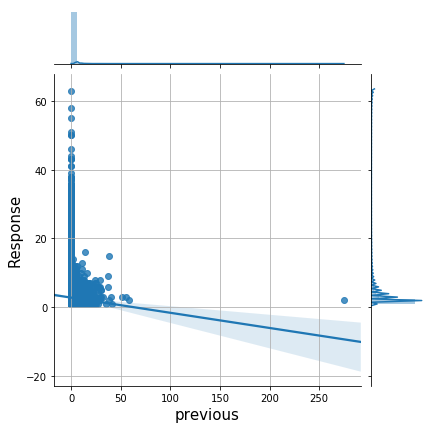

In [33]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['campaign'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<Figure size 720x576 with 0 Axes>

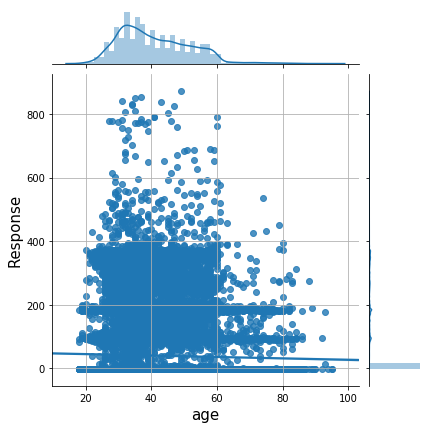

<Figure size 720x576 with 0 Axes>

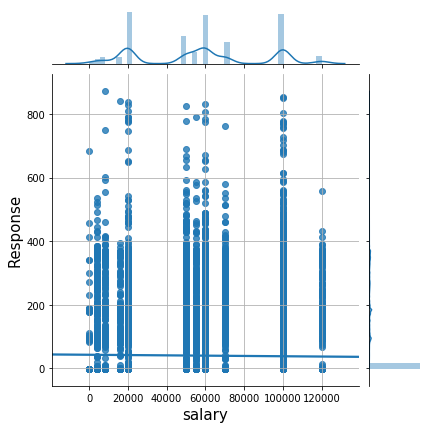

<Figure size 720x576 with 0 Axes>

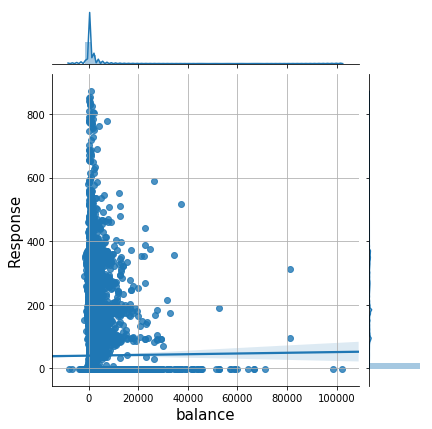

<Figure size 720x576 with 0 Axes>

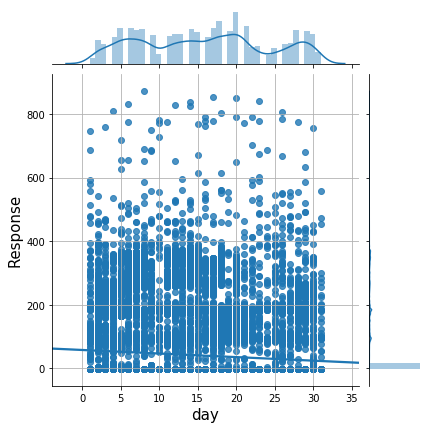

<Figure size 720x576 with 0 Axes>

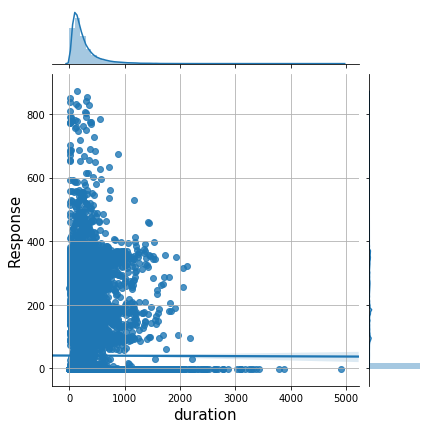

<Figure size 720x576 with 0 Axes>

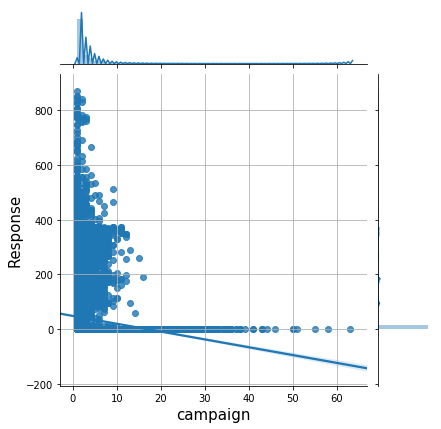

<Figure size 720x576 with 0 Axes>

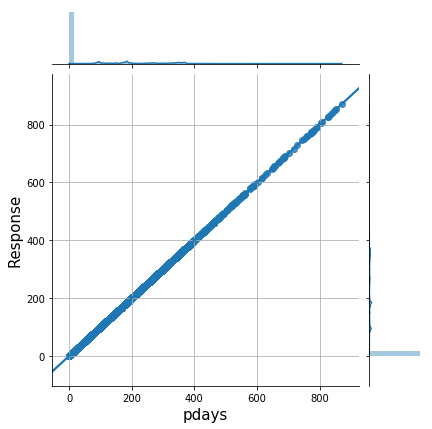

<Figure size 720x576 with 0 Axes>

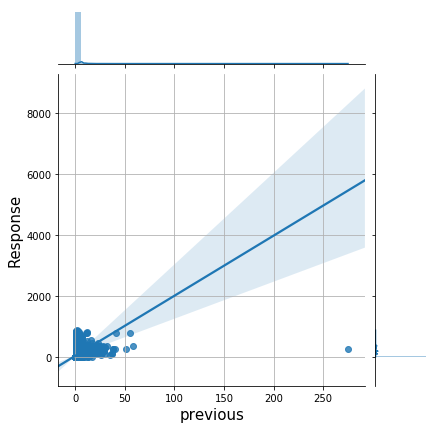

In [34]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['pdays'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

<Figure size 720x576 with 0 Axes>

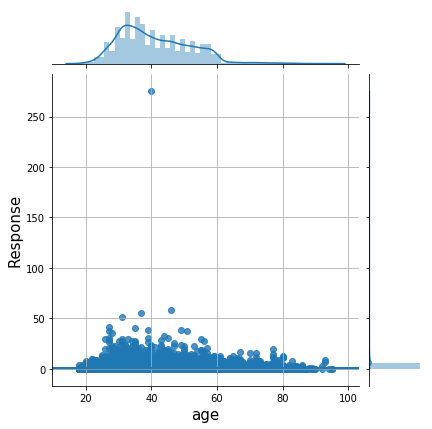

<Figure size 720x576 with 0 Axes>

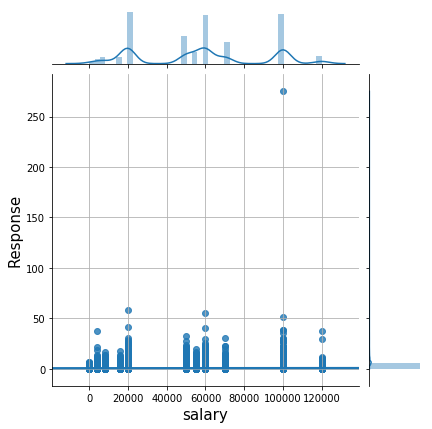

<Figure size 720x576 with 0 Axes>

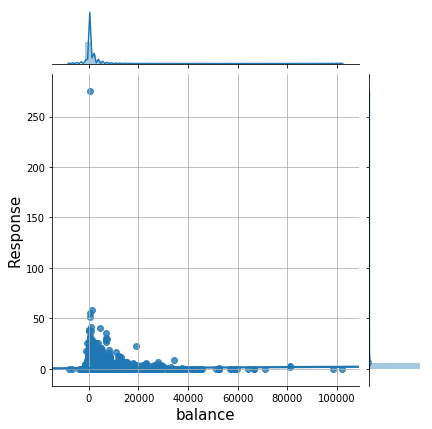

<Figure size 720x576 with 0 Axes>

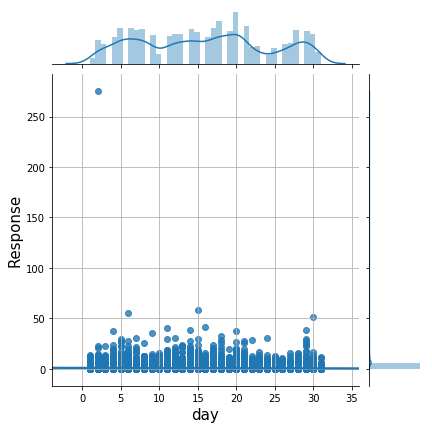

<Figure size 720x576 with 0 Axes>

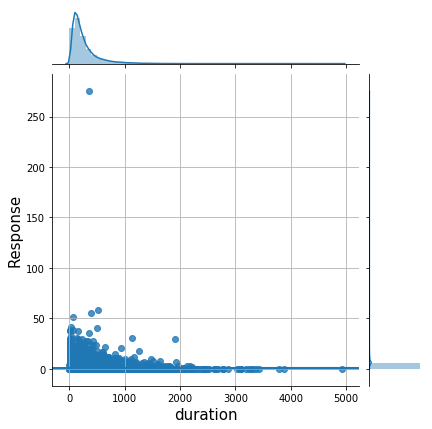

<Figure size 720x576 with 0 Axes>

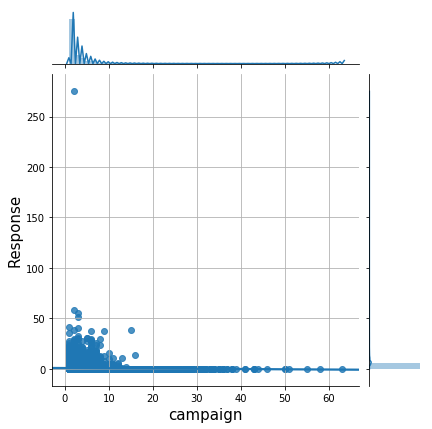

<Figure size 720x576 with 0 Axes>

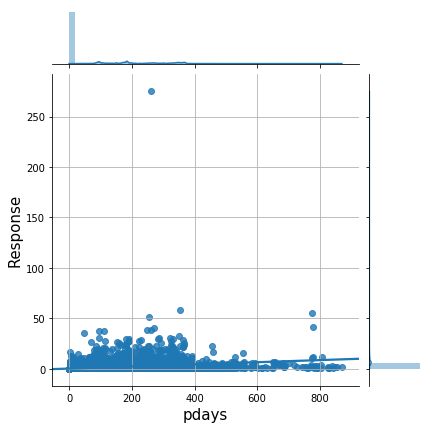

<Figure size 720x576 with 0 Axes>

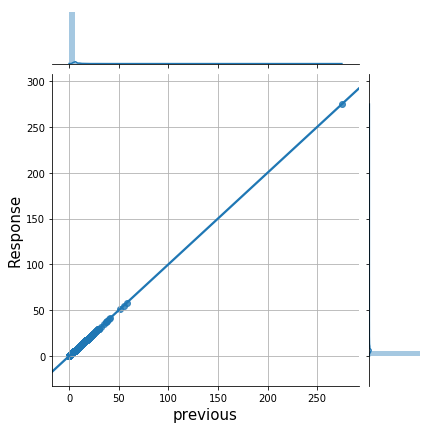

In [35]:
num = ['age','salary','balance', 'day','duration', 'campaign', 'pdays', 'previous']

for items in num:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[items],y = df['previous'],kind='reg')
    plt.xlabel(items,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

In [36]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


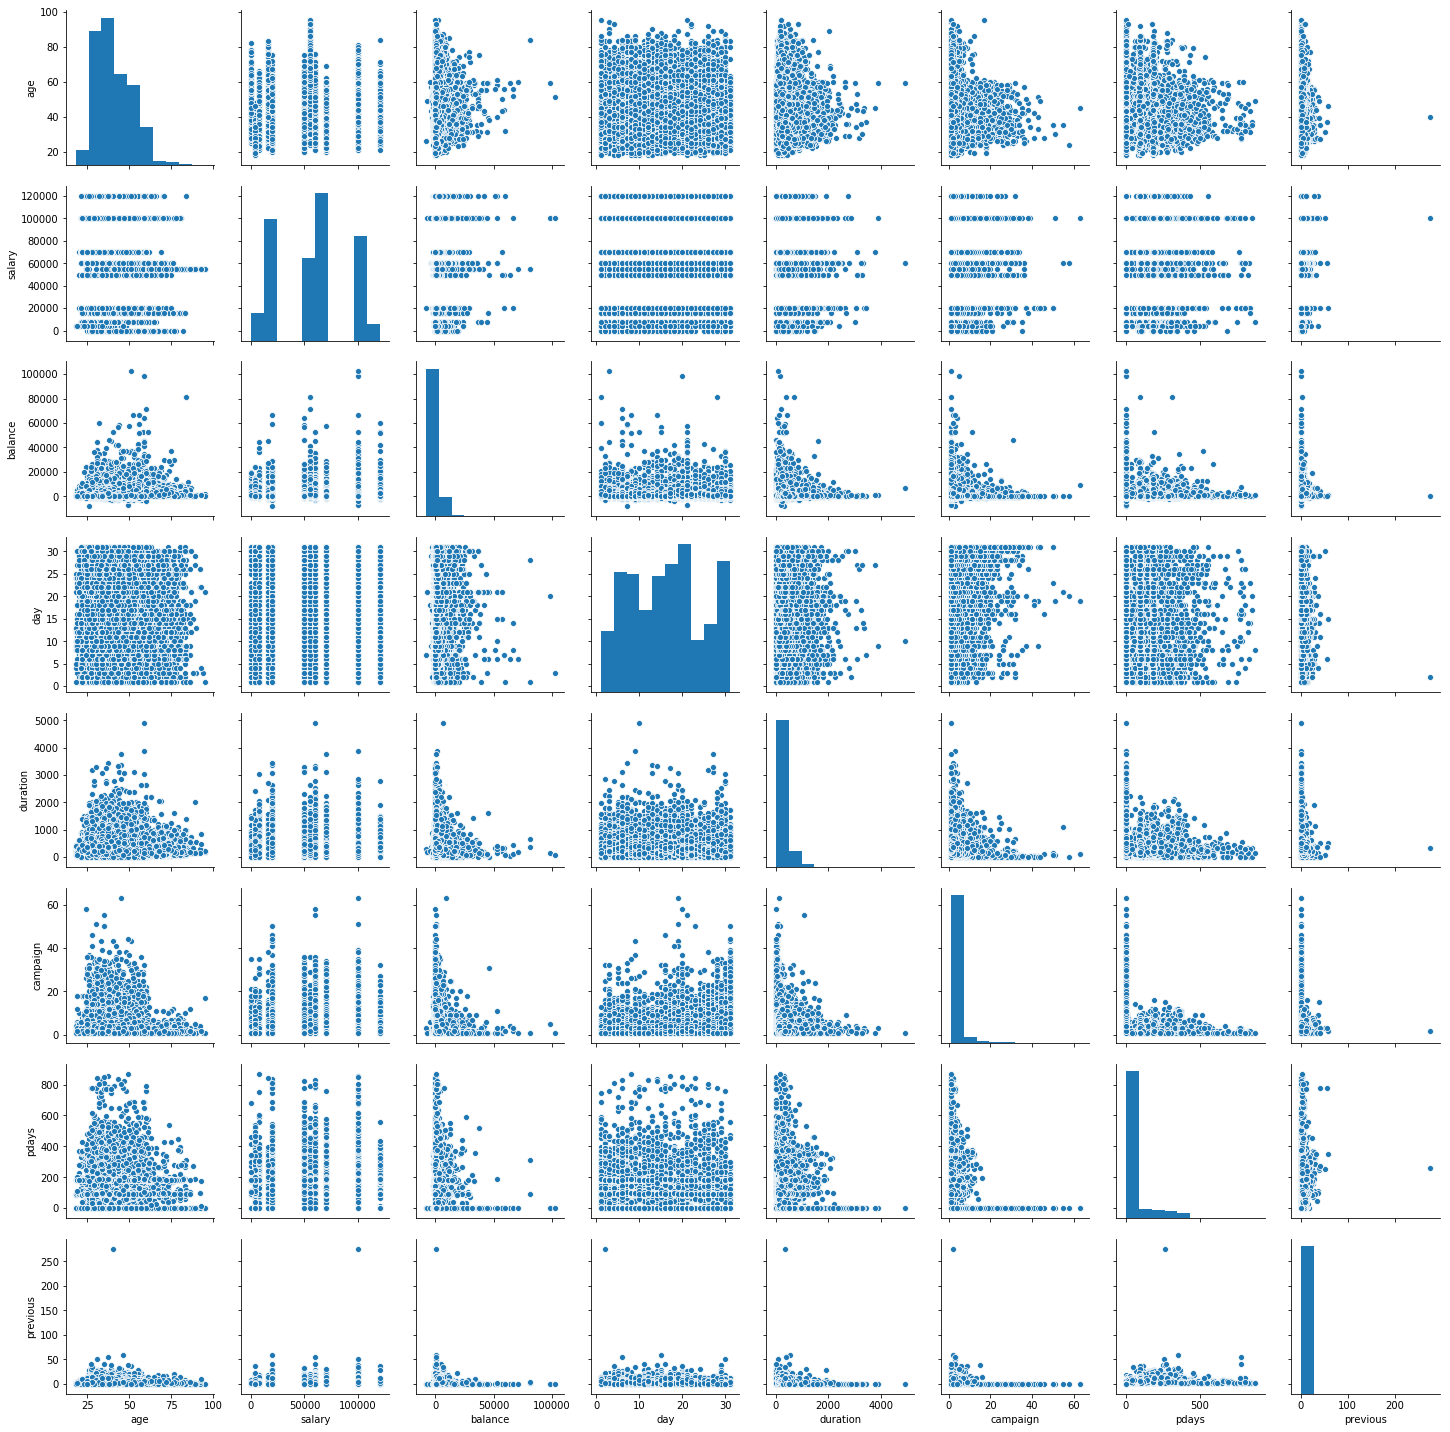

In [37]:
sns.pairplot(df)
plt.show()

In [38]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
df.drop(['campaign','pdays','previous'],axis=1,inplace=True)

In [40]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,unknown,no


In [41]:
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

In [42]:
cols_yn = ['targeted', 'default', 'housing', 'loan', 'response']

In [43]:
df1 = df.copy()

In [44]:
df1[cols_yn] = df1[cols_yn].apply(binary_map)

In [45]:
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,poutcome,response
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,unknown,0
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,unknown,0
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,unknown,0
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,unknown,0
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,1,0,825,0,0,cellular,17,nov,977,unknown,1
45207,71,retired,55000,divorced,primary,1,0,1729,0,0,cellular,17,nov,456,unknown,1
45208,72,retired,55000,married,secondary,1,0,5715,0,0,cellular,17,nov,1127,success,1
45209,57,blue-collar,20000,married,secondary,1,0,668,0,0,telephone,17,nov,508,unknown,0


In [46]:
df1 = pd.get_dummies(df1, drop_first=True)

In [47]:
df1.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,response,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,1,0,2143,1,0,5,261,0,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,1,0,29,1,0,5,151,0,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,1,0,2,1,1,5,76,0,...,0,0,0,1,0,0,0,0,0,1
3,47,20000,0,0,1506,1,0,5,92,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,0,0,1,0,0,5,198,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                    45211 non-null int64
salary                 45211 non-null int64
targeted               45211 non-null int64
default                45211 non-null int64
balance                45211 non-null int64
housing                45211 non-null int64
loan                   45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
response               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown

In [49]:
df1

,age,salary,targeted,default,balance,housing,loan,day,duration,response,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,1,0,2143,1,0,5,261,0,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,1,0,29,1,0,5,151,0,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,1,0,2,1,1,5,76,0,...,0,0,0,1,0,0,0,0,0,1
3,47,20000,0,0,1506,1,0,5,92,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,0,0,1,0,0,5,198,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,1,0,825,0,0,17,977,1,...,0,0,0,0,1,0,0,0,0,1
45207,71,55000,1,0,1729,0,0,17,456,1,...,0,0,0,0,1,0,0,0,0,1
45208,72,55000,1,0,5715,0,0,17,1127,1,...,0,0,0,0,1,0,0,0,1,0
45209,57,20000,1,0,668,0,0,17,508,0,...,0,0,0,0,1,0,0,0,0,1


In [50]:
X = df1.drop('response',axis=1)

In [51]:
X.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,1,0,2143,1,0,5,261,0,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,1,0,29,1,0,5,151,0,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,1,0,2,1,1,5,76,0,...,0,0,0,1,0,0,0,0,0,1
3,47,20000,0,0,1506,1,0,5,92,1,...,0,0,0,1,0,0,0,0,0,1
4,33,0,0,0,1,0,0,5,198,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
y = df1[['response']]

In [53]:
y.head()

,response
0,0
1,0
2,0
3,0
4,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [55]:
log = LogisticRegression()

In [56]:
scalar = MinMaxScaler()

In [57]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
log.classes_

array([0, 1])

In [59]:
log.coef_

array([[-4.52168567e-02, -6.91571221e-06, -5.04706134e-03,
        -2.40036581e-04,  4.08911793e-05, -7.70555926e-03,
        -2.11457152e-03, -4.56139993e-02,  2.92472047e-03,
        -4.35842083e-03, -2.05492358e-05, -2.90364073e-04,
         1.52184681e-03,  1.62330755e-03, -1.66810382e-04,
        -7.69484967e-04, -2.01624924e-07, -9.05199080e-04,
        -1.95619064e-04, -1.48824105e-05, -2.60856125e-03,
        -1.62039605e-03, -4.15223378e-03,  1.60822302e-03,
        -1.06193786e-05,  3.90361209e-04, -5.78468103e-03,
         7.35696485e-05,  2.94427101e-04,  1.06538782e-04,
        -1.29611462e-04, -1.32021106e-03, -8.82156087e-04,
         7.35810058e-04, -5.09457587e-03, -3.30090400e-04,
         1.03598272e-03,  8.42622529e-04,  1.66236287e-04,
         3.34538738e-03, -7.46144671e-03]])

In [60]:
pred = log.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,pred)

0.8861692716012975

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,pred)

array([[11798,   187],
       [ 1357,   222]])

In [65]:
# lets select all the features onces just forget about pvalues

In [66]:
import statsmodels.api as sm

In [67]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31606
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7522.5
Date:                Sat, 25 Jan 2020   Deviance:                       15045.
Time:                        04:40:07   Pearson chi2:                 2.87e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.2960      0.188    -12.212      0.000      -2.664      -1.928
age                     0.0023      0.003      0.868      0.385      -0.003       0.007
salary              -9.512e-06    1.2e-06     -7.944      0.000   -1.19e-05   -7.17e-06
targeted               -0.1155      0.092     -1.254      0.210      -0.296       0.065
default                -0.1632      0.208     -0.786      0.432      -0.570       0.244
balance              1.352e-05   5.69e-06      2.375      0.018    2.36e-06    2.47e-05
housing                -0.7008      0.052    -13.374      0.000      -0.804      -0.598
loan                   -0.4274      0.073     -5.875      0.000      -0.570      -0.285
day                     0.0063      0.003      2.154      0.031       0.001       0.012
duration                0.0042   7.72e-05     54.513      0.000       0.004       0.004
job_blue-collar        -0.4754      0.084     -5.634      0.000      -0.641      -0.310
job_entrepreneur        0.2758      0.151      1.832      0.067      -0.019       0.571
job_housemaid          -0.7541      0.155     -4.850      0.000      -1.059      -0.449
job_management          0.3364      0.109      3.084      0.002       0.123       0.550
job_retired             0.3225      0.118      2.745      0.006       0.092       0.553
job_self-employed      -0.2614      0.138     -1.893      0.058      -0.532       0.009
job_services            0.0153      0.106      0.144      0.885      -0.193       0.224
job_student             0.0565      0.123      0.458      0.647      -0.185       0.298
job_technician         -0.0863      0.086     -1.003      0.316      -0.255       0.082
job_unemployed         -0.4453      0.128     -3.492      0.000      -0.695      -0.195
job_unknown            -0.4845      0.226     -2.145      0.032      -0.927      -0.042
marital_married        -0.0991      0.077     -1.280      0.200      -0.251       0.053
marital_single          0.1630      0.082      1.996      0.046       0.003       0.323
education_secondary     0.2977      0.078      3.801      0.000       0.144       0.451
education_tertiary      0.4197      0.101      4.159      0.000       0.222       0.617
education_unknown       0.1740      0.153      1.135      0.257      -0.127       0.475
contact_telephone      -0.2324      0.089     -2.614      0.009      -0.407      -0.058
contact_unknown        -1.6974      0.089    -19.062      0.000      -1.872      -1.523
month_aug              -0.8052      0.092     -8.751      0.000      -0.986      -0.625
month_dec               0.6751      0.211      3.200      0.001       0.262       1.089
month_feb              -0.1880      0.106     -1.777      0.076      -0.395       0.019
month_jan              -1.3550      0.150     -9.026      0.000      -1.649      -1.061
mon

In [68]:
from sklearn.feature_selection import RFE

In [69]:
rfe = RFE(log, 25)

In [70]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=25, step=1, verbose=0)

In [71]:
rfe.ranking_

array([14, 16,  6,  1, 15,  1,  1, 12, 13,  8,  1,  1,  9,  1,  4,  7, 17,
        5,  1, 10,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1, 11])

In [72]:
rfe.support_

array([False, False, False,  True, False,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False])

In [73]:
a=X_train.columns[rfe.support_]

In [74]:
a

Index(['default', 'housing', 'loan', 'job_entrepreneur', 'job_housemaid',
       'job_retired', 'job_unemployed', 'marital_married',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [75]:
len(a)

25

In [76]:
X_train[a].describe()

,default,housing,loan,job_entrepreneur,job_housemaid,job_retired,job_unemployed,marital_married,education_secondary,education_tertiary,...,month_feb,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,...,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,0.017600,0.555092,0.158909,0.032894,0.026764,0.050305,0.028755,0.602048,0.512466,0.293077,...,0.058489,0.031283,0.152274,0.009827,0.305779,0.088318,0.016147,0.012987,0.039561,0.033431
std,0.131496,0.496963,0.365597,0.178362,0.161395,0.218577,0.167119,0.489483,0.499852,0.455181,...,0.234669,0.174083,0.359291,0.098645,0.460744,0.283761,0.126042,0.113220,0.194929,0.179763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train[a])), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31621
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9530.8
Date:                Sat, 25 Jan 2020   Deviance:                       19062.
Time:                        04:40:12   Pearson chi2:                 3.28e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1834      0.082    -14.425      0.000      -1.344      -1.023
default                -0.3242      0.189     -1.713      0.087      -0.695       0.047
housing                -0.5997      0.044    -13.552      0.000      -0.686      -0.513
loan                   -0.4404      0.064     -6.869      0.000      -0.566      -0.315
job_entrepreneur       -0.1798      0.123     -1.466      0.143      -0.420       0.061
job_housemaid          -0.2173      0.132     -1.643      0.100      -0.476       0.042
job_retired             0.4965      0.075      6.585      0.000       0.349       0.644
job_unemployed          0.2300      0.104      2.217      0.027       0.027       0.433
marital_married        -0.2768      0.039     -7.030      0.000      -0.354      -0.200
education_secondary     0.2524      0.065      3.881      0.000       0.125       0.380
education_tertiary      0.3874      0.069      5.636      0.000       0.253       0.522
education_unknown       0.3168      0.108      2.940      0.003       0.106       0.528
contact_telephone      -0.2767      0.076     -3.656      0.000      -0.425      -0.128
contact_unknown        -1.3507      0.065    -20.698      0.000      -1.479      -1.223
month_aug              -1.0360      0.070    -14.837      0.000      -1.173      -0.899
month_dec               0.6085      0.186      3.276      0.001       0.244       0.972
month_feb              -0.5172      0.081     -6.392      0.000      -0.676      -0.359
month_jan              -1.2079      0.122     -9.876      0.000      -1.448      -0.968
month_jul              -0.8726      0.070    -12.425      0.000      -1.010      -0.735
month_mar               0.9404      0.130      7.239      0.000       0.686       1.195
month_may              -0.5891      0.062     -9.516      0.000      -0.710      -0.468
month_nov              -0.8697      0.080    -10.925      0.000      -1.026      -0.714
month_oct               0.7160      0.109      6.561      0.000       0.502       0.930
month_sep               0.6099      0.121      5.060      0.000       0.374       0.846
poutcome_other          0.2489      0.084      2.979      0.003       0.085       0.413
poutcome_success        2.2670      0.073     31.218      0.000       2.125       2.409
=======================================================================================
"""

In [78]:
# the rfe has selected features but some featues are high value but just build a model

In [79]:
log.fit(X_train[a],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
log.classes_

array([0, 1])

In [81]:
log.coef_

array([[-0.31619429, -0.60005521, -0.44082161, -0.1791678 , -0.21704585,
         0.49312215,  0.2253226 , -0.27780316,  0.2447388 ,  0.37977573,
         0.30719717, -0.27431142, -1.34573422, -1.02967825,  0.5934308 ,
        -0.51075905, -1.1883982 , -0.86751198,  0.93036274, -0.58598942,
        -0.86221789,  0.71271051,  0.60698795,  0.24734539,  2.25567065]])

In [82]:
pred = log.predict(X_test[a])

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test,pred)

0.8916248894131524

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test,pred)

array([[11822,   163],
       [ 1307,   272]])

In [87]:
# the model done well but in that there were few high p values

In [88]:
# lets check with another approach ie.. vif

In [89]:
# vif with all the values of X_train

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 25)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,salary,183.325172
12,job_management,29.304188
10,job_entrepreneur,8.971388
9,job_blue-collar,8.395869
34,month_may,4.799593
23,education_tertiary,4.132628
15,job_services,4.103103
17,job_technician,3.851261
32,month_jun,3.472751
31,month_jul,3.075864


In [92]:
# now looking to the various factors such as vif and rfe lets take features manually and build a model

In [93]:
b = ['housing','loan','job_retired','marital_married','education_secondary','education_tertiary','education_unknown','contact_telephone',
     'contact_unknown','month_aug','month_dec','month_feb','month_jan','month_jul','month_mar','month_may','month_nov','month_oct',
    'month_sep','poutcome_other','poutcome_success' ]

In [94]:
log2 = sm.GLM(y_train,(sm.add_constant(X_train[b])), family = sm.families.Binomial())
log2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31625
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9537.5
Date:                Sat, 25 Jan 2020   Deviance:                       19075.
Time:                        04:40:20   Pearson chi2:                 3.29e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1949      0.081    -14.839      0.000      -1.353      -1.037
housing                -0.6001      0.044    -13.604      0.000      -0.687      -0.514
loan                   -0.4553      0.064     -7.127      0.000      -0.581      -0.330
job_retired             0.5025      0.075      6.724      0.000       0.356       0.649
marital_married        -0.2818      0.039     -7.171      0.000      -0.359      -0.205
education_secondary     0.2656      0.064      4.127      0.000       0.139       0.392
education_tertiary      0.3949      0.068      5.824      0.000       0.262       0.528
education_unknown       0.3213      0.107      2.997      0.003       0.111       0.531
contact_telephone      -0.2806      0.076     -3.710      0.000      -0.429      -0.132
contact_unknown        -1.3571      0.065    -20.800      0.000      -1.485      -1.229
month_aug              -1.0391      0.070    -14.899      0.000      -1.176      -0.902
month_dec               0.6134      0.186      3.301      0.001       0.249       0.978
month_feb              -0.5039      0.081     -6.248      0.000      -0.662      -0.346
month_jan              -1.1948      0.122     -9.780      0.000      -1.434      -0.955
month_jul              -0.8789      0.070    -12.527      0.000      -1.016      -0.741
month_mar               0.9472      0.130      7.297      0.000       0.693       1.202
month_may              -0.5876      0.062     -9.494      0.000      -0.709      -0.466
month_nov              -0.8743      0.080    -10.996      0.000      -1.030      -0.718
month_oct               0.7192      0.109      6.597      0.000       0.506       0.933
month_sep               0.6135      0.120      5.093      0.000       0.377       0.850
poutcome_other          0.2478      0.084      2.968      0.003       0.084       0.411
poutcome_success        2.2746      0.073     31.346      0.000       2.132       2.417
=======================================================================================
"""

In [95]:
log.fit(X_train[b],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
log.classes_

array([0, 1])

In [97]:
log.coef_

array([[-0.60034921, -0.45540929,  0.49929286, -0.28270332,  0.25790729,
         0.38724882,  0.3117163 , -0.27824583, -1.3520495 , -1.03274292,
         0.59816873, -0.4978087 , -1.17564532, -0.87363389,  0.93687421,
        -0.58442056, -0.86680962,  0.71579298,  0.61054163,  0.24634075,
         2.26316711]])

In [98]:
predf = log.predict(X_test[b])

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,predf)

0.8911825420230021

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [102]:
confusion_matrix(y_test,predf)

array([[11804,   181],
       [ 1295,   284]])

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

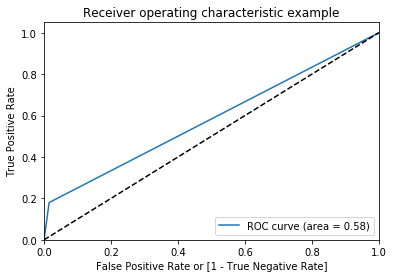

(array([0.        , 0.01510221, 1.        ]),
 array([0.        , 0.17986067, 1.        ]),
 array([2, 1, 0]))

In [104]:
draw_roc(y_test,predf)

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test,predf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11985
           1       0.61      0.18      0.28      1579

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [107]:
X.head(n=3)

,age,salary,targeted,default,balance,housing,loan,day,duration,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,1,0,2143,1,0,5,261,0,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,1,0,29,1,0,5,151,0,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,1,0,2,1,1,5,76,0,...,0,0,0,1,0,0,0,0,0,1


In [108]:
y.head(n=3)

,response
0,0
1,0
2,0


In [109]:
# Holdout Validation Approach - Train and Test Set Split

In [110]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=100)
log = LogisticRegression()
log.fit(X_train,y_train)
result = log.score(X_train,y_train)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 88.77%


In [111]:
# Stratified K-fold Cross-Validation

In [112]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 88.27%


In [113]:
# K-fold Cross-Validation

In [114]:
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 88.64%


In [115]:
# Repeated Random Test-Train Splits

In [116]:
kfold2 = model_selection.ShuffleSplit(n_splits=5, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 88.72% (0.07%)


In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
log = LogisticRegression()

In [119]:
cross_val_score(log,X,y,cv=5)

array([0.90489882, 0.8876479 , 0.88763548, 0.867286  , 0.87335472])

In [120]:
cross_val_score(log,X,y,cv=5).mean()

0.8841645832337133

In [121]:
standardizer = StandardScaler()
log = LogisticRegression()
pipeline = make_pipeline(standardizer, log)

In [122]:
kf = KFold(n_splits=10, shuffle=True, random_state=100)

In [123]:
cv_results = cross_val_score(pipeline, 
                             X, 
                             y, 
                             cv=kf, 
                             scoring="accuracy", 
                             n_jobs=-1) 

In [124]:
cv_results.mean()

0.9014399459361154

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model = RandomForestClassifier(n_estimators=50)

In [127]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
print('Number of Trees used : ', model.n_estimators)

Number of Trees used :  50


In [129]:
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 


accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data [0 0 0 ... 0 0 0]

accuracy_score on train dataset :  0.9997472114260435


In [130]:
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 


accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data [0 0 0 ... 0 0 0]

accuracy_score on test dataset :  0.9029047478619876


In [131]:
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 85.92%


In [132]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11985
           1       0.64      0.38      0.48      1579

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
param_grid = {
    'max_depth': [1, 2, 5, 10, 20],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [1, 3, 4, 5],
#    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [135]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [136]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  7.0min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [137]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
best_model = grid_search.best_estimator_

In [139]:
pred= best_model.predict(X_test)

In [140]:
confusion_matrix(y_test,pred)

array([[11791,   194],
       [ 1135,   444]])

In [141]:
#XGB-Classifier

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [143]:
from xgboost import XGBClassifier

In [144]:
classifier = XGBClassifier()

In [145]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [146]:
pred = classifier.predict(X_test)

In [147]:
confusion_matrix(y_test,pred)

array([[11655,   330],
       [  977,   602]])

In [148]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11985
           1       0.65      0.38      0.48      1579

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564

